# Iterative modeling process
Importing our functions, loading in our images, train test splitting and one hot encoding them

In [9]:
from Functions import *

In [10]:
filname = 'fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('fer2013.csv',names=names)
im=df['pixels']
df.head(10)
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)
N, D = X.shape
X = X.reshape(N, 48, 48, 1)
cascade = load_cascade_classifier_xml()
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)
Y = (np.arange(num_class) == Y[:, None]).astype(np.float32)

7
(35887, 48, 48, 1)


The first model that I started out with was pretrained and upon looking at its activations it seemed to not detect the characteristics of the expressions it was predicting. 

In [11]:
model = Sequential()
input_shape = (48,48,1)
model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [1]:
model.load_weights('firstmodel')

NameError: name 'model' is not defined

In [6]:
# model.save_weights('firstmodel')

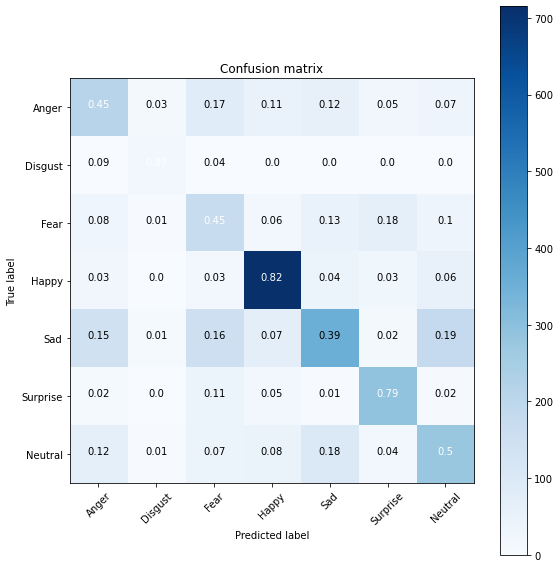

In [14]:
modelaccuracy(model,X_test,y_test,label_map)

#### Second Model: Make layer simpler to see if it improves my model

In [8]:
model1 = Sequential()
input_shape = (48,48,1)
model1.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(128))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Dense(64))
model1.add(Dense(7))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')




In [9]:
model1.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/5
1010/1010 [==============================] - 8s 8ms/step - loss: 1.5179 - accuracy: 0.4140 - val_loss: 1.5616 - val_accuracy: 0.3876
Epoch 2/5
1010/1010 [==============================] - 7s 7ms/step - loss: 1.2296 - accuracy: 0.5322 - val_loss: 1.6739 - val_accuracy: 0.3486
Epoch 3/5
1010/1010 [==============================] - 7s 7ms/step - loss: 1.0863 - accuracy: 0.5906 - val_loss: 1.6619 - val_accuracy: 0.4199
Epoch 4/5
1010/1010 [==============================] - 7s 7ms/step - loss: 0.9573 - accuracy: 0.6414 - val_loss: 1.0906 - val_accuracy: 0.5829
Epoch 5/5
1010/1010 [==============================] - 7s 7ms/step - loss: 0.8134 - accuracy: 0.6972 - val_loss: 1.4300 - val_accuracy: 0.4700


In [10]:
model1.save_weights('model1')

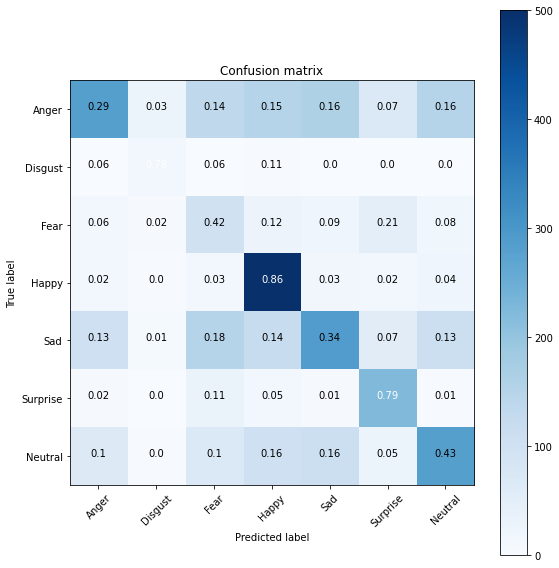

In [11]:
modelaccuracy(model1,X_test,y_test,label_map)

Happiness predicted well, surprise predictd well, rest are all pretty low. 

## Third Model: Let's see if we can make another layer 

In [12]:
model2 = Sequential()
input_shape = (48,48,1)
model2.add(Conv2D(64, (3, 3), input_shape=input_shape,activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(3, 3)))

model2.add(Conv2D(64, (5, 5),activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))



model2.add(Flatten())
model2.add(Dense(256))
model2.add(Dropout(0.2))
model2.add(Activation('relu'))
model2.add(Dense(128))
model2.add(Dropout(0.2))
model2.add(Activation('relu'))
model2.add(Dense(64))
model2.add(Dropout(0.2))
model2.add(Activation('relu'))
model2.add(Dense(7))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [13]:
model2.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1010/1010 [==============================] - 5s 5ms/step - loss: 1.7581 - accuracy: 0.2776 - val_loss: 1.5763 - val_accuracy: 0.3781
Epoch 2/10
1010/1010 [==============================] - 5s 5ms/step - loss: 1.4875 - accuracy: 0.4216 - val_loss: 1.3813 - val_accuracy: 0.4656
Epoch 3/10
1010/1010 [==============================] - 5s 5ms/step - loss: 1.3605 - accuracy: 0.4763 - val_loss: 1.2924 - val_accuracy: 0.5093
Epoch 4/10
1010/1010 [==============================] - 5s 5ms/step - loss: 1.2736 - accuracy: 0.5148 - val_loss: 1.2643 - val_accuracy: 0.5121
Epoch 5/10
1010/1010 [==============================] - 5s 5ms/step - loss: 1.2001 - accuracy: 0.5455 - val_loss: 1.2211 - val_accuracy: 0.5294
Epoch 6/10
1010/1010 [==============================] - 5s 5ms/step - loss: 1.1304 - accuracy: 0.5754 - val_loss: 1.2022 - val_accuracy: 0.5486
Epoch 7/10
1010/1010 [==============================] - 5s 5ms/step - loss: 1.0619 - accuracy: 0.6056 - val_loss: 1.2186 - val_accuracy:

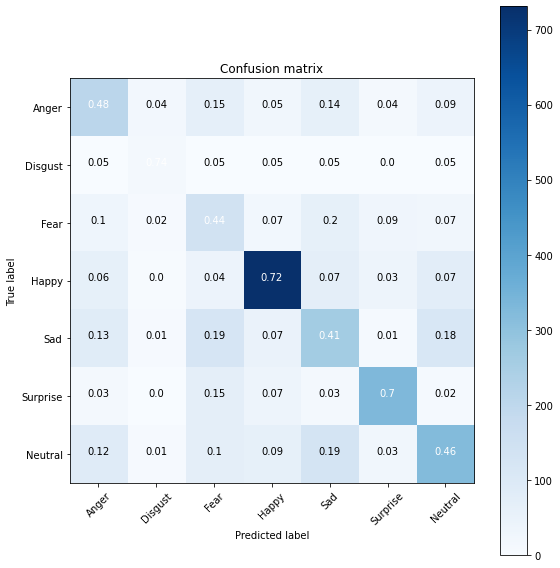

In [14]:
model2.save_weights('model2')
modelaccuracy(model2,X_test,y_test,label_map)

Happiness still predicted well but not as well so our prediction decreased than the previous model. 

In [16]:
model3 = Sequential()
input_shape = (48,48,1)
model3.add(Conv2D(64, (5, 5),activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(256, (3, 3), input_shape=input_shape,activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(3, 3)))

model3.add(Conv2D(64, (5, 5),activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))



model3.add(Flatten())
model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dense(7))
model3.add(Activation('softmax'))

model3.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [17]:
model3.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))



Epoch 1/10
1010/1010 [==============================] - 7s 7ms/step - loss: 1.7793 - accuracy: 0.2669 - val_loss: 1.6445 - val_accuracy: 0.3268
Epoch 2/10
1010/1010 [==============================] - 7s 7ms/step - loss: 1.5596 - accuracy: 0.3708 - val_loss: 1.5869 - val_accuracy: 0.3904
Epoch 3/10
1010/1010 [==============================] - 7s 7ms/step - loss: 1.4396 - accuracy: 0.4326 - val_loss: 1.3824 - val_accuracy: 0.4581
Epoch 4/10
1010/1010 [==============================] - 7s 7ms/step - loss: 1.3475 - accuracy: 0.4750 - val_loss: 1.3421 - val_accuracy: 0.4837
Epoch 5/10
1010/1010 [==============================] - 7s 7ms/step - loss: 1.2753 - accuracy: 0.5066 - val_loss: 1.3039 - val_accuracy: 0.4948
Epoch 6/10
1010/1010 [==============================] - 7s 7ms/step - loss: 1.2055 - accuracy: 0.5359 - val_loss: 1.2803 - val_accuracy: 0.5071
Epoch 7/10
1010/1010 [==============================] - 7s 7ms/step - loss: 1.1462 - accuracy: 0.5635 - val_loss: 1.2888 - val_accuracy:

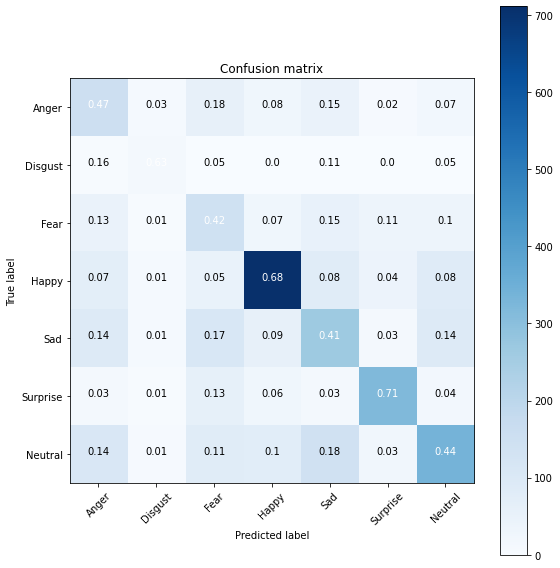

In [18]:
model3.save_weights('model3')
modelaccuracy(model3,X_test,y_test,label_map)

Still do not have a big difference from other models. Let's keep trying

## Model 4:

In [19]:
model4 = Sequential()
input_shape = (48,48,1)
model4.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model4.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model4.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model4.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())
model4.add(Dense(250))

model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.2))
model4.add(Dense(250))

model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.2))
model4.add(Dense(250))

model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.2))
model4.add(Dense(64))
model4.add(Activation('relu'))
model4.add(Dense(7))
model4.add(Activation('softmax'))

model4.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


In [20]:
model4.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))


Epoch 1/10
1010/1010 [==============================] - 17s 17ms/step - loss: 1.6924 - accuracy: 0.3214 - val_loss: 1.5434 - val_accuracy: 0.3926
Epoch 2/10
1010/1010 [==============================] - 16s 16ms/step - loss: 1.4073 - accuracy: 0.4565 - val_loss: 1.2991 - val_accuracy: 0.5032
Epoch 3/10
1010/1010 [==============================] - 16s 16ms/step - loss: 1.2349 - accuracy: 0.5337 - val_loss: 1.2291 - val_accuracy: 0.5336
Epoch 4/10
1010/1010 [==============================] - 16s 16ms/step - loss: 1.1101 - accuracy: 0.5815 - val_loss: 1.1830 - val_accuracy: 0.5578
Epoch 5/10
1010/1010 [==============================] - 17s 17ms/step - loss: 0.9996 - accuracy: 0.6290 - val_loss: 1.1355 - val_accuracy: 0.5857
Epoch 6/10
1010/1010 [==============================] - 16s 16ms/step - loss: 0.8729 - accuracy: 0.6791 - val_loss: 1.1051 - val_accuracy: 0.5979
Epoch 7/10
1010/1010 [==============================] - 16s 16ms/step - loss: 0.7317 - accuracy: 0.7367 - val_loss: 1.2019 -

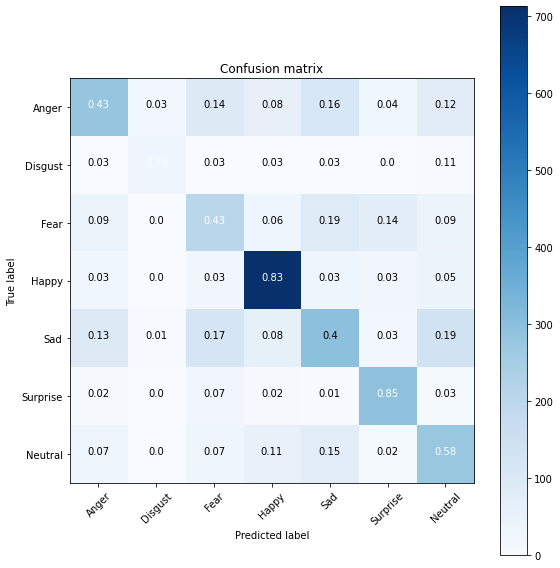

In [21]:
model4.save_weights('model4')
modelaccuracy(model4,X_test,y_test,label_map)


In [48]:
model5 = Sequential()
input_shape = (48,48,1)
model5.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model5.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model5.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Conv2D(512, (3, 3),activation='relu',padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Flatten())

model5.add(Dense(1200))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.5))

model5.add(Dense(900))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.4))

model5.add(Dense(500))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.2))

model5.add(Dense(125))
model5.add(BatchNormalization())
model5.add(Activation('relu'))

model5.add(Dense(15))
model5.add(BatchNormalization())
model5.add(Activation('relu'))

model5.add(Dense(7))
model5.add(BatchNormalization())
model5.add(Activation('softmax'))

model5.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


In [49]:
model5.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))


Epoch 1/10
1010/1010 [==============================] - 23s 23ms/step - loss: 1.7922 - accuracy: 0.2993 - val_loss: 1.6347 - val_accuracy: 0.3745
Epoch 2/10
1010/1010 [==============================] - 23s 23ms/step - loss: 1.4590 - accuracy: 0.4448 - val_loss: 1.4427 - val_accuracy: 0.4480
Epoch 3/10
1010/1010 [==============================] - 23s 23ms/step - loss: 1.2670 - accuracy: 0.5279 - val_loss: 1.3309 - val_accuracy: 0.5032
Epoch 4/10
1010/1010 [==============================] - 23s 22ms/step - loss: 1.1509 - accuracy: 0.5755 - val_loss: 1.2115 - val_accuracy: 0.5391
Epoch 5/10
1010/1010 [==============================] - 23s 23ms/step - loss: 1.0485 - accuracy: 0.6155 - val_loss: 1.1128 - val_accuracy: 0.5795
Epoch 6/10
1010/1010 [==============================] - 23s 23ms/step - loss: 0.9358 - accuracy: 0.6657 - val_loss: 1.1414 - val_accuracy: 0.5862
Epoch 7/10
1010/1010 [==============================] - 23s 22ms/step - loss: 0.8054 - accuracy: 0.7179 - val_loss: 1.1974 -

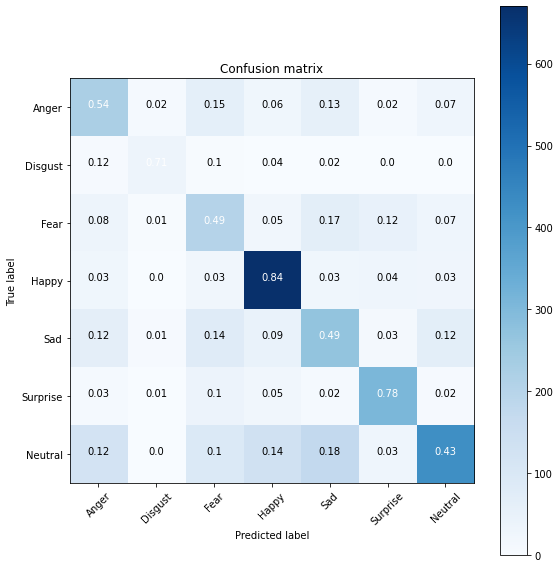

In [51]:
model5.save_weights('model5')
modelaccuracy(model5,X_test,y_test,label_map)


In [125]:
model6 = Sequential()
input_shape = (48,48,1)
model6.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Conv2D(512, (3, 3),activation='relu',padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Flatten())
model6.add(BatchNormalization())


model6.add(Dense(900))
model6.add(Activation('relu'))
model6.add(Dropout(0.5))

model6.add(BatchNormalization())

model6.add(Dense(500))
model6.add(Activation('relu'))
model6.add(Dropout(0.5))

model6.add(BatchNormalization())


model6.add(Dense(125))
model6.add(Activation('relu'))
model6.add(Dropout(0.5))

model6.add(BatchNormalization())

model6.add(Dense(15))
model6.add(Activation('relu'))
model6.add(Dropout(0.5))

model6.add(Dense(7))
model6.add(Activation('softmax'))

model6.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


In [126]:
model6.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))


Epoch 1/10
1010/1010 [==============================] - 12s 12ms/step - loss: 1.9270 - accuracy: 0.2221 - val_loss: 1.8005 - val_accuracy: 0.2602
Epoch 2/10
1010/1010 [==============================] - 12s 12ms/step - loss: 1.7935 - accuracy: 0.2595 - val_loss: 1.9155 - val_accuracy: 0.2563
Epoch 3/10
1010/1010 [==============================] - 12s 12ms/step - loss: 1.7287 - accuracy: 0.2897 - val_loss: 1.7357 - val_accuracy: 0.3396
Epoch 4/10
1010/1010 [==============================] - 12s 12ms/step - loss: 1.6440 - accuracy: 0.3373 - val_loss: 1.5109 - val_accuracy: 0.4074
Epoch 5/10
1010/1010 [==============================] - 12s 12ms/step - loss: 1.5744 - accuracy: 0.3705 - val_loss: 1.4734 - val_accuracy: 0.4218
Epoch 6/10
1010/1010 [==============================] - 12s 12ms/step - loss: 1.5417 - accuracy: 0.3896 - val_loss: 1.5056 - val_accuracy: 0.4079
Epoch 7/10
1010/1010 [==============================] - 12s 12ms/step - loss: 1.5179 - accuracy: 0.4024 - val_loss: 1.5121 -

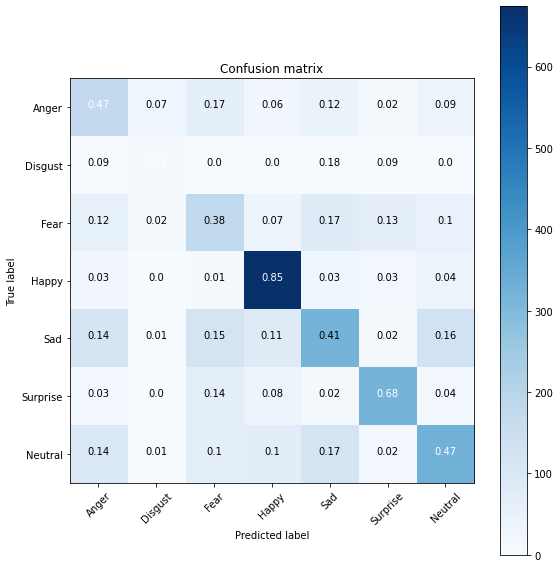

In [99]:
model6.save_weights('model6')
modelaccuracy(model6,X_test,y_test,label_map)


In [127]:
model7 = Sequential()
input_shape = (48,48,1)
model7.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Conv2D(512, (3, 3),activation='relu',padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Flatten())
model7.add(BatchNormalization())


model7.add(Dense(999))
model7.add(Activation('relu'))
model7.add(Dropout(0.5))

model7.add(BatchNormalization())

model7.add(Dense(750))
model7.add(Activation('relu'))
model7.add(Dropout(0.25))

model7.add(BatchNormalization())


model7.add(Dense(500))
model7.add(Activation('relu'))
model7.add(Dropout(0.2))

model7.add(BatchNormalization())

model7.add(Dense(100))
model7.add(Activation('relu'))
model7.add(Dropout(0.2))

model7.add(BatchNormalization())

model7.add(Dense(50))
model7.add(Activation('relu'))
model7.add(Dropout(0.1))

model7.add(BatchNormalization())

model7.add(Dense(25))
model7.add(Activation('relu'))
model7.add(Dropout(0.1))

model7.add(Dense(7))
model7.add(Activation('softmax'))

model7.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [128]:
model7.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))


Epoch 1/10
1010/1010 [==============================] - 14s 13ms/step - loss: 1.8415 - accuracy: 0.2377 - val_loss: 1.8672 - val_accuracy: 0.1725
Epoch 2/10
1010/1010 [==============================] - 13s 13ms/step - loss: 1.6839 - accuracy: 0.3227 - val_loss: 2.0453 - val_accuracy: 0.2711
Epoch 3/10
1010/1010 [==============================] - 13s 13ms/step - loss: 1.5701 - accuracy: 0.3875 - val_loss: 1.9305 - val_accuracy: 0.3374
Epoch 4/10
1010/1010 [==============================] - 13s 13ms/step - loss: 1.4720 - accuracy: 0.4315 - val_loss: 1.4073 - val_accuracy: 0.4578
Epoch 5/10
1010/1010 [==============================] - 13s 13ms/step - loss: 1.4281 - accuracy: 0.4514 - val_loss: 2.0852 - val_accuracy: 0.4040
Epoch 6/10
1010/1010 [==============================] - 13s 13ms/step - loss: 1.3979 - accuracy: 0.4652 - val_loss: 1.5275 - val_accuracy: 0.4778
Epoch 7/10
1010/1010 [==============================] - 14s 13ms/step - loss: 1.3498 - accuracy: 0.4818 - val_loss: 1.3767 -

/content/drive/My Drive/ColabNotebooks/Emoition-classification-from-facial-expression/Functions.py:85: RuntimeWarning: invalid value encountered in true_divide
  cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)


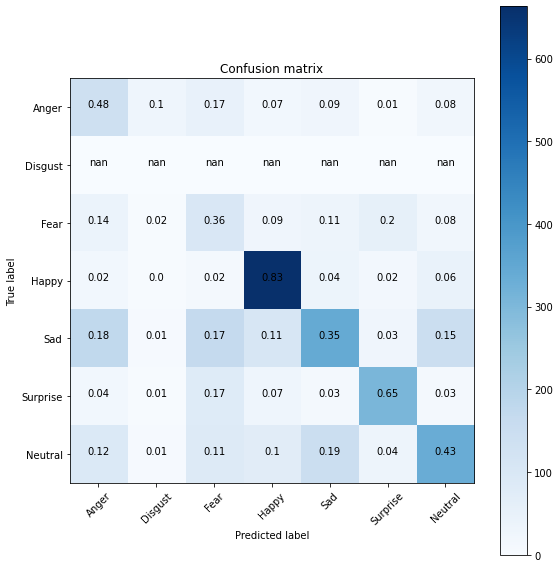

In [129]:
model7.save_weights('model7')
modelaccuracy(model7,X_test,y_test,label_map)


In [134]:
model8 = Sequential()
input_shape = (48,48,1)
model8.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model8.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model8.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))

model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Conv2D(256, (5, 5),activation='relu',padding='same'))
model8.add(Conv2D(256, (3, 3),activation='relu',padding='same'))

model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Conv2D(1024, (3, 3),activation='relu',padding='same'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Flatten())
model8.add(BatchNormalization())


model8.add(Dense(999))
model8.add(Activation('relu'))
model8.add(Dropout(0.3))
model8.add(BatchNormalization())

model8.add(Dense(750))
model8.add(Activation('relu'))
model8.add(Dropout(0.3))

model8.add(BatchNormalization())


model8.add(Dense(500))
model8.add(Activation('relu'))
model8.add(Dropout(0.2))

model8.add(BatchNormalization())

model8.add(Dense(100))
model8.add(Activation('relu'))
model8.add(Dropout(0.2))

model8.add(BatchNormalization())

model8.add(Dense(25))
model8.add(Activation('relu'))
model8.add(Dropout(0.1))

model8.add(Dense(7))
model8.add(Activation('softmax'))

model8.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [135]:
model8.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))


Epoch 1/10
1010/1010 [==============================] - 37s 37ms/step - loss: 1.8466 - accuracy: 0.2474 - val_loss: 1.8862 - val_accuracy: 0.1764
Epoch 2/10
1010/1010 [==============================] - 37s 37ms/step - loss: 1.7148 - accuracy: 0.3119 - val_loss: 1.7522 - val_accuracy: 0.3316
Epoch 3/10
1010/1010 [==============================] - 37s 37ms/step - loss: 1.6092 - accuracy: 0.3686 - val_loss: 1.8372 - val_accuracy: 0.3653
Epoch 4/10
1010/1010 [==============================] - 37s 37ms/step - loss: 1.5172 - accuracy: 0.4120 - val_loss: 1.5613 - val_accuracy: 0.4015
Epoch 5/10
1010/1010 [==============================] - 37s 37ms/step - loss: 1.4462 - accuracy: 0.4443 - val_loss: 1.4888 - val_accuracy: 0.4294
Epoch 6/10
1010/1010 [==============================] - 37s 36ms/step - loss: 1.3970 - accuracy: 0.4655 - val_loss: 1.4883 - val_accuracy: 0.4798
Epoch 7/10
1010/1010 [==============================] - 37s 37ms/step - loss: 1.3424 - accuracy: 0.4908 - val_loss: 1.3799 -

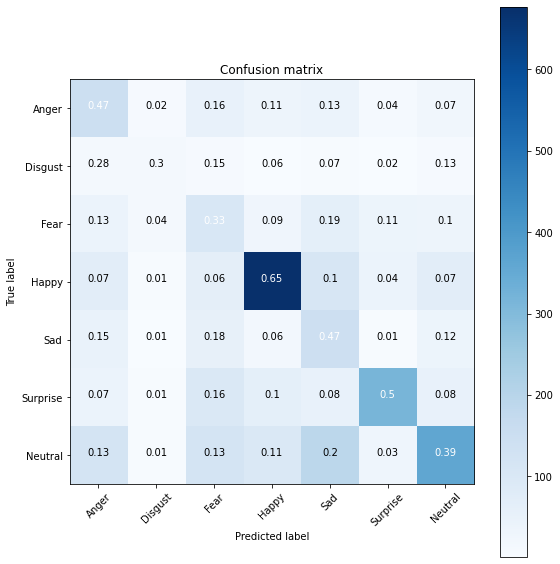

In [136]:
model8.save_weights('model8')
modelaccuracy(model8,X_test,y_test,label_map)

In [148]:

final_model = Sequential()
input_shape = (48,48,1)
final_model.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
final_model.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
final_model.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))

final_model.add(MaxPooling2D(pool_size=(2, 2)))

final_model.add(Conv2D(256, (5, 5),activation='relu',padding='same'))
final_model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))

final_model.add(MaxPooling2D(pool_size=(2, 2)))

final_model.add(Conv2D(1024, (3, 3),activation='relu',padding='same'))
final_model.add(BatchNormalization())
final_model.add(MaxPooling2D(pool_size=(2, 2)))

final_model.add(Flatten())
final_model.add(BatchNormalization())


final_model.add(Dense(999))
final_model.add(Activation('relu'))
final_model.add(Dropout(0.3))
final_model.add(BatchNormalization())

final_model.add(Dense(750))
final_model.add(Activation('relu'))
final_model.add(Dropout(0.3))

final_model.add(BatchNormalization())


final_model.add(Dense(500))
final_model.add(Activation('relu'))
final_model.add(Dropout(0.2))

final_model.add(BatchNormalization())

final_model.add(Dense(100))
final_model.add(Activation('relu'))
final_model.add(Dropout(0.2))

final_model.add(BatchNormalization())

final_model.add(Dense(25))
final_model.add(Activation('relu'))
final_model.add(Dropout(0.1))

final_model.add(Dense(7))
final_model.add(Activation('softmax'))

final_model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [149]:
final_model.fit(X,Y,epochs=20)


Epoch 1/20
1122/1122 [==============================] - 40s 35ms/step - loss: 1.8237 - accuracy: 0.2552
Epoch 2/20
1122/1122 [==============================] - 39s 35ms/step - loss: 1.7237 - accuracy: 0.3083
Epoch 3/20
1122/1122 [==============================] - 40s 35ms/step - loss: 1.6551 - accuracy: 0.3419
Epoch 4/20
1122/1122 [==============================] - 39s 35ms/step - loss: 1.5404 - accuracy: 0.3986
Epoch 5/20
1122/1122 [==============================] - 40s 35ms/step - loss: 1.4565 - accuracy: 0.4363
Epoch 6/20
1122/1122 [==============================] - 39s 35ms/step - loss: 1.3879 - accuracy: 0.4670
Epoch 7/20
1122/1122 [==============================] - 39s 35ms/step - loss: 1.3241 - accuracy: 0.4956
Epoch 8/20
1122/1122 [==============================] - 39s 35ms/step - loss: 1.2901 - accuracy: 0.5071
Epoch 9/20
1122/1122 [==============================] - 39s 35ms/step - loss: 1.2611 - accuracy: 0.5217
Epoch 10/20
1122/1122 [==============================] - 39s 35m

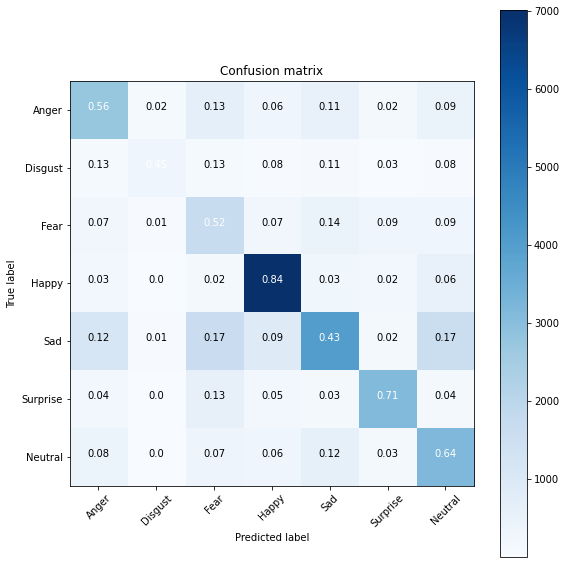

In [150]:
final_model.save_weights('FinalModel')
modelaccuracy(final_model,X,Y,label_map)